# Final Project

Rosa Kurtz

Notes: This project simulates a cold gravitational collapse of a spherical distribution of N-bodies. Individual methods are tested in the above cells while the final version of the algorithm can be found below under the subject line "Gravitational N-body Algorithm". The output is produced in a widget format so the result can be manually evolved in time using a slidebar.

### modules

In [1]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt, arccos, cbrt

#random
from numpy.random import seed, rand

#3D plotting
import mpl_toolkits.mplot3d.axes3d as axes3d

# SciPy
import scipy.fftpack as fft

#widgets 
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider,FloatSlider
import ipywidgets as widgets


mpl.style.use('default')
plt.rcParams['figure.dpi']       = 100
plt.rcParams['savefig.dpi']      = 100
plt.rcParams['axes.labelsize']   = 12
plt.rcParams['legend.fontsize']  = 12
plt.rcParams['legend.frameon']   = False


### convention choices

[ i , j , k ] is associated with ( x , y , z ) for all fields

## Initial Conditions

### PM code and Position

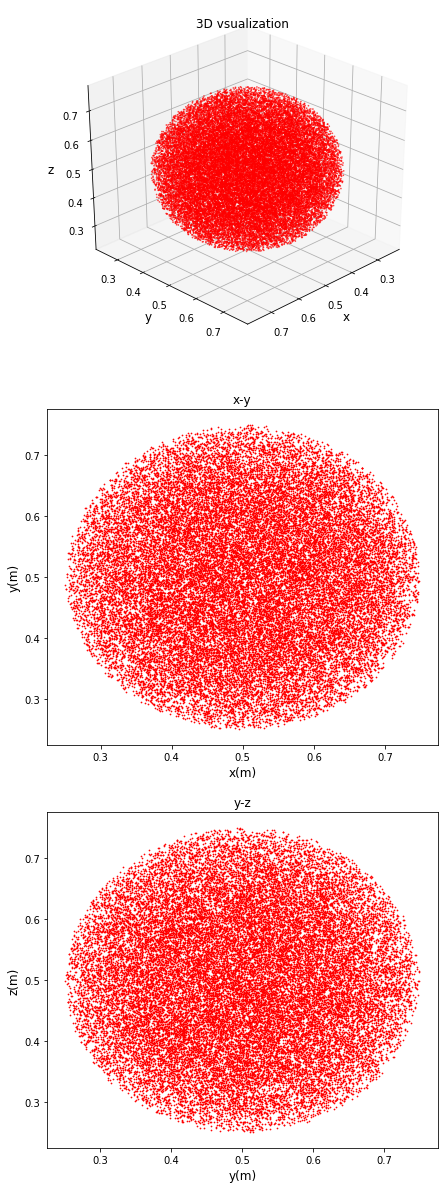

In [2]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt, arccos
from numpy.random import seed, rand

#3D plotting
import mpl_toolkits.mplot3d.axes3d as axes3d

Nc = 128
Np = 32**3
L = 1
Rs = L/4
se = 12

def plotPar():
    sphPos=np.zeros((Np,3))
    
    seed(se); 
    
    sphPos[:Np,0]=(rand(Np)**(1/3))*Rs
    sphPos[:Np,1]=arccos(rand(Np)*2 -1)
    sphPos[:Np,2]=rand(Np)*(2*pi)
    
    if(Np==1):
        sphPos[:Np,0]=0
        sphPos[:Np,1]=0
        sphPos[:Np,2]=0
    
    x=sphPos[:,0]*sin(sphPos[:Np,1])*cos(sphPos[:Np,2])
    y=sphPos[:Np,0]*sin(sphPos[:Np,1])*sin(sphPos[:Np,2])
    z=sphPos[:Np,0]*cos(sphPos[:Np,1])
    
    x=x+L/2
    y=y+L/2
    z=z+L/2
    
    return x,y,z

##initial position and velocity
part=np.ones((Np,9))
part[:Np,0], part[:Np,1], part[:Np,2]= plotPar()
part[:Np,3:6]=0


fig = plt.figure(figsize=(7, 21))
ax1 = fig.add_subplot(311, projection='3d')

x=part[:Np,0]
y=part[:Np,1]
z=part[:Np,2]

xmin , xmax, ymin, ymax = 0,1,0,1

ax1.scatter(x, y, z, s=.5, c='r', marker='o')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
plt.title('3D vsualization')
ax1.view_init(30, 45)

ax2 = fig.add_subplot(312)
ax2.scatter(part[:Np,0], part[:Np,1], s=.5, c='r', marker='o')
plt.title('x-y')
plt.xlabel('x(m)')
plt.ylabel('y(m)')

ax3 = fig.add_subplot(313)
ax3.scatter(part[:Np,1], part[:Np,2], s=.5, c='r', marker='o')
plt.title('y-z')
plt.xlabel('y(m)')
plt.ylabel('z(m)')

plt.show()



### Density Field with CIC

In [3]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt, arccos
from numpy.random import seed, rand

#3D plotting
import mpl_toolkits.mplot3d.axes3d as axes3d

#widgets ***see note
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider,FloatSlider
import ipywidgets as widgets


Nc =128
Np = 32**3
L = 1
m = .1 #kg
Rs = L/4
se = 12


def plotPar():
    sphPos=np.zeros((Np,3))
    
    seed(se); 
    
    sphPos[:Np,0]=(rand(Np)**(1/3))*Rs
    sphPos[:Np,1]=arccos(rand(Np)*2 -1)
    sphPos[:Np,2]=rand(Np)*(2*pi)
    
    if(Np==1):
        sphPos[:Np,0]=0
        sphPos[:Np,1]=0
        sphPos[:Np,2]=0
    
    x=sphPos[:,0]*sin(sphPos[:Np,1])*cos(sphPos[:Np,2])
    y=sphPos[:Np,0]*sin(sphPos[:Np,1])*sin(sphPos[:Np,2])
    z=sphPos[:Np,0]*cos(sphPos[:Np,1])
    
    x=x+L/2
    y=y+L/2
    z=z+L/2
    
    return x,y,z


def den(part): 
    density = np.zeros((Nc,Nc,Nc))
    for p in range(Np):
        z=part[p,2]*Nc
        zs=int(z)
        x=part[p,0]*Nc
        xs=int(x) 
        y=part[p,1]*Nc
        ys=int(y) 
            
        perx = 1-(x-xs) #x percent in xs
        pery = 1-(y-ys) #y percent in ys
        perz = 1-(z-zs) #y percent in ys
        perx1 =(x-xs) #x percent in xs+1
        pery1 = (y-ys) #y percent in ys+1
        perz1 = (z-zs)
        
        density[xs,ys,zs] = density[xs,ys,zs] + (perx*pery*perz)
        density[xs+1,ys,zs] = density[xs+1,ys,zs] + (perx1*pery*perz)
        density[xs,ys+1,zs] = density[xs,ys+1,zs] + (perx*pery1*perz)
        density[xs+1,ys+1,zs] = density[xs+1,ys+1,zs] + (perx1*pery1*perz) 
            
        density[xs,ys,zs+1] = density[xs,ys,zs+1] + (perx*pery*perz1)
        density[xs+1,ys,zs+1] = density[xs+1,ys,zs+1] + (perx1*pery*perz1)
        density[xs,ys+1,zs+1] = density[xs,ys+1,zs+1] + (perx*pery1*perz1)
        density[xs+1,ys+1,zs+1] = density[xs+1,ys+1,zs+1] + (perx1*pery1*perz1)
    
    volCell=(L/Nc)**3
    density=(density*m)/volCell
    totalmass=(np.sum(density))*volCell
    correctmass=Np*m
    
    print("Check, the total mass of the system is : ",totalmass, "kg")
    print("the total mass of the system should be : ",correctmass, "kg")
    
    return density


#define positions
part=np.ones((Np,9))
part[:Np,0], part[:Np,1], part[:Np,2]= plotPar() #positions
part[:Np,3:6]=0 

#generate density field
density=den(part)            
 

def slow_function(Slice):
    zs=Slice          
    xy=density[:Nc,:Nc,zs]

    fig = plt.figure(figsize=(8, 8))

    plt.title('Density field')
    plt.xlabel('y(m)')
    plt.ylabel('x(m)')
    color_map = plt.imshow(xy, origin='lower',vmin=0, vmax=600000, extent=[0,1,0,1])
    color_map.set_cmap("inferno")

    plt.colorbar()
    plt.show()


    
    
interact_manual(slow_function, Slice=IntSlider(value=Nc//2,min=0, max=128, step=1));




Check, the total mass of the system is :  3276.8000000000006 kg
the total mass of the system should be :  3276.8 kg


interactive(children=(IntSlider(value=64, description='Slice', max=128), Button(description='Run Interact', st…

### Gravitational Potential with Fourier Transforms

Np is: 32768 particles
Check, the total mass of the system is :  3276.8000000000006 kg
the total mass of the system should be :  3276.8 kg
  
Np is: 1 particle
Check, the total mass of the system is :  0.1 kg
the total mass of the system should be :  0.1 kg
  


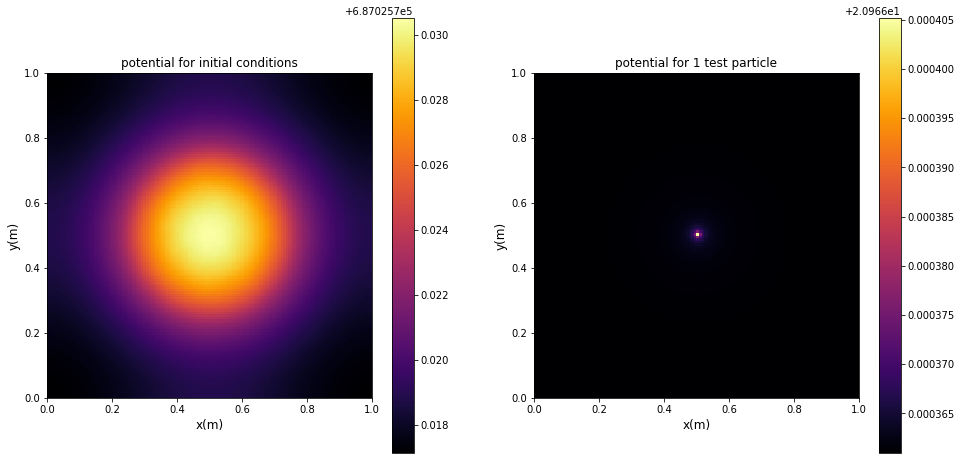

In [4]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt,arccos

#random
from numpy.random import seed, rand

#3D plotting
import mpl_toolkits.mplot3d.axes3d as axes3d

# SciPy
import scipy.fftpack as fft

G=6.6738*10**-11 #m^3 kg^-1 s^-2

Nc=128
Np=32**3
L=1

m=.1 #kg

Rs = L/4
se=12
eps=1*10**-12

###create positions (modify 'part')
def plotPar(Np):
    sphPos=np.zeros((Np,3))
    
    seed(se); 
    
    sphPos[:Np,0]=(rand(Np)**(1/3))*Rs
    sphPos[:Np,1]=arccos(rand(Np)*2 -1)
    sphPos[:Np,2]=rand(Np)*(2*pi)
    
    if(Np==1):
        sphPos[:Np,0]=0
        sphPos[:Np,1]=0
        sphPos[:Np,2]=0
    
    x=sphPos[:,0]*sin(sphPos[:Np,1])*cos(sphPos[:Np,2])
    y=sphPos[:Np,0]*sin(sphPos[:Np,1])*sin(sphPos[:Np,2])
    z=sphPos[:Np,0]*cos(sphPos[:Np,1])
    
    x=x+L/2
    y=y+L/2
    z=z+L/2
    
    return x,y,z



def den(part):  ###CIC scheme
    density = np.zeros((Nc,Nc,Nc))
    for p in range(Np):
        z=part[p,2]*Nc# + Nc/2
        zs=int(z)
        x=part[p,0]*Nc# + Nc/2
        xs=int(x) 
        y=part[p,1]*Nc #+ Nc/2
        ys=int(y) 
            
        perx = 1-(x-xs) #x percent in xs
        pery = 1-(y-ys) #y percent in ys
        perz = 1-(z-zs) #y percent in ys
        perx1 =(x-xs) #x percent in xs+1
        pery1 = (y-ys) #y percent in ys+1
        perz1 = (z-zs)
        
        density[xs,ys,zs] = density[xs,ys,zs] + (perx*pery*perz)
        density[xs+1,ys,zs] = density[xs+1,ys,zs] + (perx1*pery*perz)
        density[xs,ys+1,zs] = density[xs,ys+1,zs] + (perx*pery1*perz)
        density[xs+1,ys+1,zs] = density[xs+1,ys+1,zs] + (perx1*pery1*perz) 
            
        density[xs,ys,zs+1] = density[xs,ys,zs+1] + (perx*pery*perz1)
        density[xs+1,ys,zs+1] = density[xs+1,ys,zs+1] + (perx1*pery*perz1)
        density[xs,ys+1,zs+1] = density[xs,ys+1,zs+1] + (perx*pery1*perz1)
        density[xs+1,ys+1,zs+1] = density[xs+1,ys+1,zs+1] + (perx1*pery1*perz1)
    
    volCell=(L/Nc)**3
    density=(density*m)/volCell
    totalmass=(np.sum(density))*volCell
    correctmass=Np*m
    print("Check, the total mass of the system is : ",totalmass, "kg")
    print("the total mass of the system should be : ",correctmass, "kg")
    print("  ")
    return density


def gravKernel(sh): #takes in shape of densityk
    lx,ly,lz = sh[0],sh[1],sh[2]
    
    kx=np.zeros(lx)
    ky=np.zeros(ly)
    kz=np.zeros(lz)
    wk = np.zeros((lx,ly,lz))
    
    for i in range(lx):
        if(i  <  ( (lx//2)+1) ):
            kx[i]=( (2*pi) / lx ) * i
            ky[i]=( (2*pi) / ly ) * i  
        else:
            kx[i]=( (2*pi) / lx) * (i-lx)
            ky[i]=( (2*pi) / ly) * (i-ly)
            
    for k in range(lz):
        kz[k]=( (2*pi) / (2*(lz-1)))*k
        
    for i in range(lx):
        for j in range(ly):
            wk[i,j,:]=(pi*G) / ((sin(kx[i]/2)**2) + (sin(ky[j]/2)**2) + (sin(kz/2)**2) + eps)              
    
    return wk



def gravPotential(density):
    densityk = np.fft.rfftn(density)   
    wk=gravKernel(densityk.shape)
    potentialk=densityk*wk
    potential = np.fft.irfftn(potentialk)
    potential[0,0,0]=0
    return potential

def potentials():
    #define positions
    part=np.ones((Np,9))
    part[:Np,0], part[:Np,1], part[:Np,2]= plotPar(Np) #positions
    part[:Np,3:6]=0 

    #generate density field
    density=den(part) 

    #generate graviational potential from density
    potential=gravPotential(density)
    return potential


print("Np is:", Np, "particles")
potential=potentials()
xy=potential[:Nc,:Nc,Nc//2]

Np=1
print("Np is:", Np, "particle")
potential1=potentials()
xy1=potential1[:Nc,:Nc,Nc//2]




#### density field CIC method

fig = plt.figure(figsize=(16, 8))

ax1=plt.subplot(121)

plt.title('potential for initial conditions')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
color_map = plt.imshow(xy, origin='lower', extent=[0,1,0,1])
color_map.set_cmap("inferno")
plt.colorbar()

ax1=plt.subplot(122)

plt.title('potential for 1 test particle')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
color_map = plt.imshow(xy1, origin='lower', extent=[0,1,0,1])
color_map.set_cmap("inferno")
plt.colorbar()




plt.show()



## One Particle Test 
notes:
<br>
1) The potential was corrected by a factor of (L/N)^2
<br>
<br>
2) I initially considered creating a seperate function to calculate points in the force field of a single particle instead of using the acceleration function needed later in the program. While I went back and did it the intended way with the acceleration function and 32^3 particle positions, the original method was useful to me so I decided to let it stay in my program. This is why I have 2 pairs of force vs distance and log(force) vs log(distance). The first set is the orginal method and the second (scatter plots) are the intended method using the acceleration function.


Check, the total mass of the system is :  0.1 kg
the total mass of the system should be :  0.1 kg


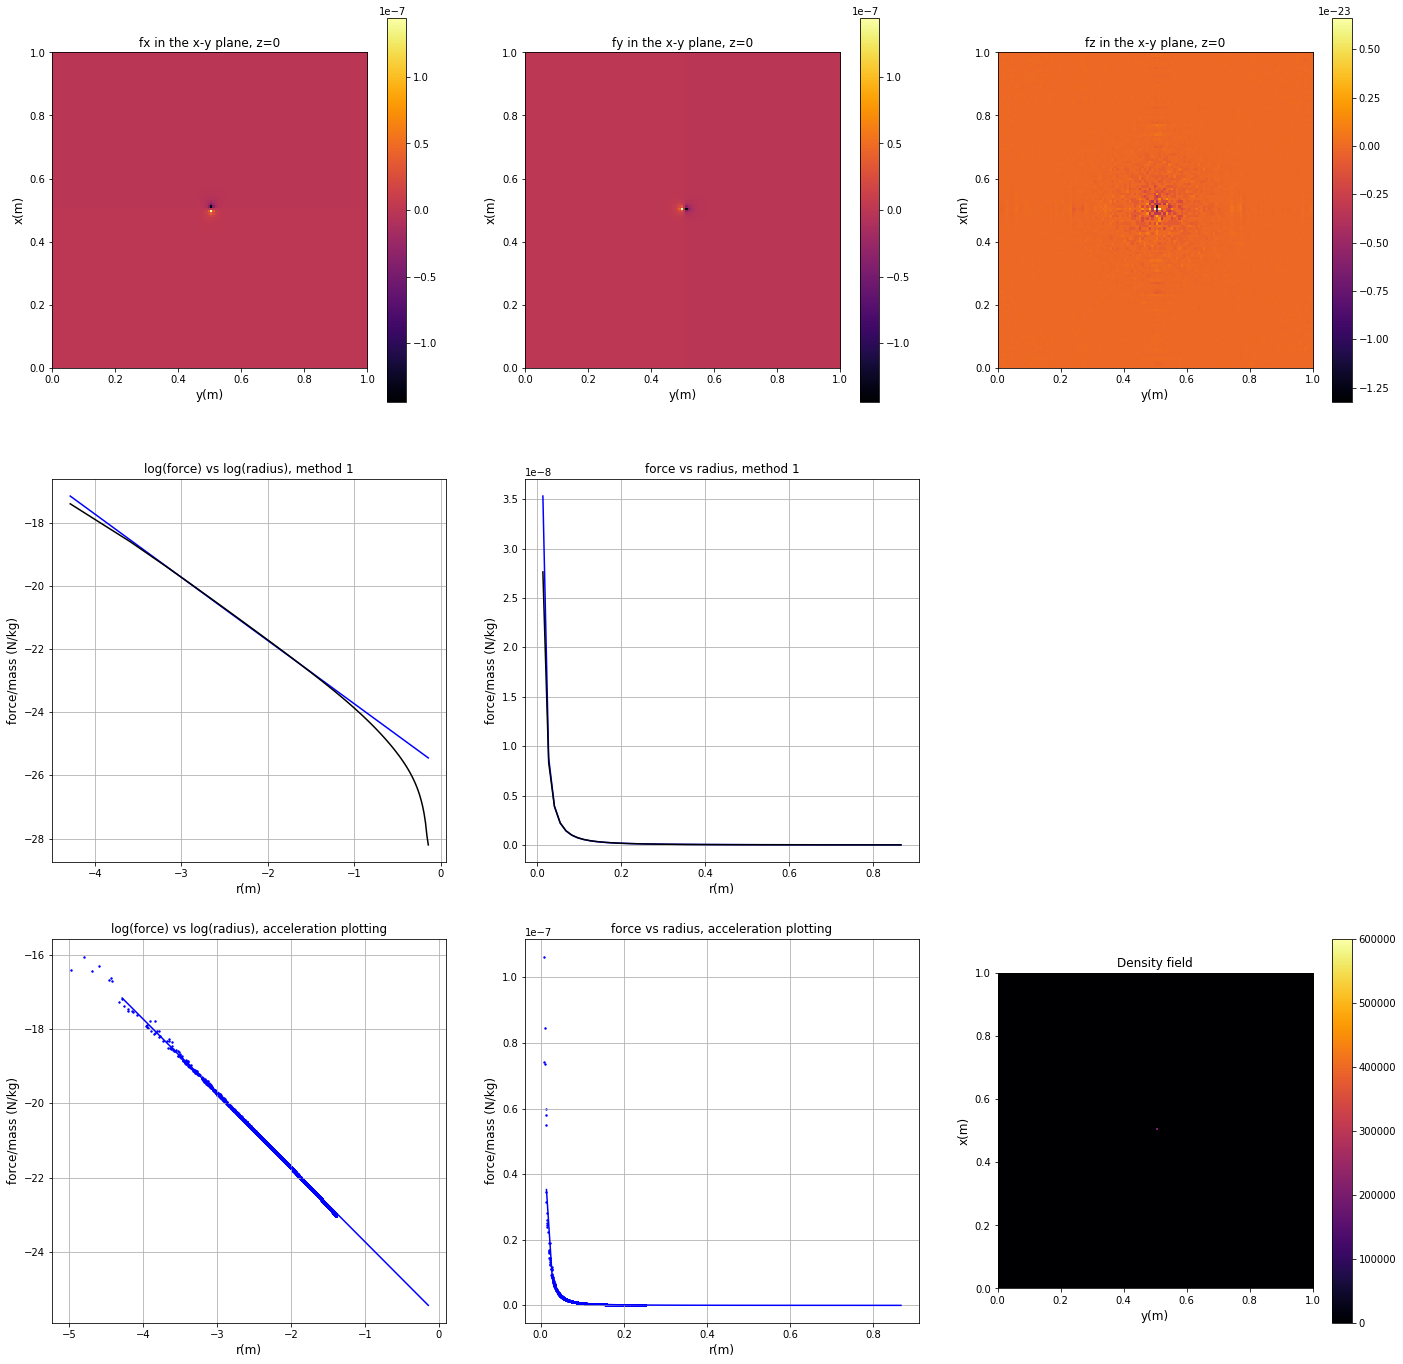

In [5]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt, arccos, cbrt

#random
from numpy.random import seed, rand

#3D plotting
import mpl_toolkits.mplot3d.axes3d as axes3d

# SciPy
import scipy.fftpack as fft

G=6.6738*10**-11 #m^3 kg^-1 s^-2

Nc=128
Np=1#32**3
L=1
m=.1 
Rs = L/4

se=12
λ = .5
eps=1*(10**(-12))

Ms = m*Np
t_dyn=sqrt(((pi**2)*(Rs**3))/(4*G*Ms))




def plotPar(Np):
    sphPos=np.zeros((Np,3))
    
    seed(se); 
    
    sphPos[:Np,0]=(rand(Np)**(1/3))*Rs
    sphPos[:Np,1]=arccos(rand(Np)*2 -1)
    sphPos[:Np,2]=rand(Np)*(2*pi)
    
    if(Np==1):
        sphPos[:Np,0]=0
        sphPos[:Np,1]=0
        sphPos[:Np,2]=0
    
    x=sphPos[:,0]*sin(sphPos[:Np,1])*cos(sphPos[:Np,2])
    y=sphPos[:Np,0]*sin(sphPos[:Np,1])*sin(sphPos[:Np,2])
    z=sphPos[:Np,0]*cos(sphPos[:Np,1])
    
    x=x+L/2
    y=y+L/2
    z=z+L/2
    
    return x,y,z



def den(part):  ###CIC scheme
    density = np.zeros((Nc,Nc,Nc))
    for p in range(Np):
        z=part[p,2]*Nc
        zs=int(z)
        x=part[p,0]*Nc
        xs=int(x) 
        y=part[p,1]*Nc 
        ys=int(y) 
            
        perx = 1-(x-xs) 
        pery = 1-(y-ys)
        perz = 1-(z-zs) 
        perx1 =(x-xs) 
        pery1 = (y-ys) 
        perz1 = (z-zs)
        
        density[xs,ys,zs] = density[xs,ys,zs] + (perx*pery*perz)
        density[xs+1,ys,zs] = density[xs+1,ys,zs] + (perx1*pery*perz)
        density[xs,ys+1,zs] = density[xs,ys+1,zs] + (perx*pery1*perz)
        density[xs+1,ys+1,zs] = density[xs+1,ys+1,zs] + (perx1*pery1*perz) 
            
        density[xs,ys,zs+1] = density[xs,ys,zs+1] + (perx*pery*perz1)
        density[xs+1,ys,zs+1] = density[xs+1,ys,zs+1] + (perx1*pery*perz1)
        density[xs,ys+1,zs+1] = density[xs,ys+1,zs+1] + (perx*pery1*perz1)
        density[xs+1,ys+1,zs+1] = density[xs+1,ys+1,zs+1] + (perx1*pery1*perz1)
    
    volCell=(L/Nc)**3
    density=(density*m)/volCell
    totalmass=(np.sum(density))*volCell
    correctmass=Np*m
    print("Check, the total mass of the system is : ",totalmass, "kg")
    print("the total mass of the system should be : ",correctmass, "kg")
    return density




def gravKernel(sh): #takes in shape of densityk
    lx,ly,lz = sh[0],sh[1],sh[2]
    
    kx=np.zeros(lx)
    ky=np.zeros(ly)
    kz=np.zeros(lz)
    wk = np.zeros((lx,ly,lz))
    
    for i in range(lx):
        if(i  <  ( (lx//2)+1) ):
            kx[i]=( (2*pi) / lx ) * i
            ky[i]=( (2*pi) / ly ) * i  
        else:
            kx[i]=( (2*pi) / lx) * (i-lx)
            ky[i]=( (2*pi) / ly) * (i-ly)
            
    for k in range(lz):
        kz[k]=( (2*pi) / (2*(lz-1)))*k
        
    for i in range(lx):
        for j in range(ly):
            wk[i,j,:]=(pi*G) / ((sin(kx[i]/2)**2) + (sin(ky[j]/2)**2) + (sin(kz/2)**2) + eps)              
    
    return wk

def kernal():
    densityk = np.fft.rfftn(density)
    wk=gravKernel(densityk.shape)
    return wk

def gravPotential(density,wk):
    densityk = np.fft.rfftn(density)
    sh=densityk.shape
    lx,ly,lz = sh[0],sh[1],sh[2]
    potentialk=np.zeros((lx,ly,lz))
    potentialk=densityk*wk            
    potentialk[0,0,0]=0
    potential = np.fft.irfftn(potentialk)
    return potential


def parf(g):
    h=L/Nc
    
    fx = np.zeros((Nc,Nc,Nc))
    fy = np.zeros((Nc,Nc,Nc))
    fz = np.zeros((Nc,Nc,Nc))
    
    fx[0,:,:]=(g[0+1,:,:]-g[0,:,:])/h
    fx[Nc-1,:,:]=(g[Nc-1,:,:]-g[Nc-2,:,:])/h
    
    fy[:,0,:]=(g[:,0+1,:]-g[:,0,:])/h
    fy[:,Nc-1,:]=(g[:,Nc-1,:]-g[:,Nc-2,:])/h
    
    fz[:,:,0]=(g[:,:,0+1]-g[:,:,0])/h
    fz[:,:,Nc-1]=(g[:,:,Nc-1]-g[:,:,Nc-2])/h
        
    for i in range(1,Nc-1):
        fx[i,:,:]=(g[i+1,:,:]-g[i-1,:,:])/(2*h)
        fy[:,i,:]=(g[:,i+1,:]-g[:,i-1,:])/(2*h)
        fz[:,:,i]=(g[:,:,i+1]-g[:,:,i-1])/(2*h)
    
    return fx, fy, fz

def a(p,fx,fy,fz,Np): 
    x=p[:, 0]*Nc 
    y=p[:, 1]*Nc 
    z=p[:, 2]*Nc 
    
    xs=np.array(x, int)
    ys=np.array(y, int)
    zs=np.array(z, int)
    
    zper = 1-(z-zs)
    zper1 = (z-zs)
    yper = 1-(y-ys)
    yper1 = (y-ys)
    xper = 1-(x-xs)
    xper1 = (x-xs)
    
    total=0
    total=total+(xper*yper*zper) + (xper1*yper*zper) + (xper*yper1*zper)+(xper*yper*zper1)+(xper1*yper*zper1)
    total=total+(xper1*yper1*zper) +(xper*yper1*zper1)+(xper1*yper1*zper1)
    
    ac=np.ones((Np,3))
    ac[:,0]=fx[xs,ys,zs]*(xper*yper*zper) + fx[xs+1,ys,zs]*(xper1*yper*zper) + fx[xs,ys+1,zs]*(xper*yper1*zper)#8 cells...
    ac[:,0]=ac[:,0]+fx[xs,ys,zs+1]*(xper*yper*zper1) + fx[xs+1,ys,zs+1]*(xper1*yper*zper1) + fx[xs+1,ys+1,zs]*(xper1*yper1*zper) 
    ac[:,0]=ac[:,0]+fx[xs,ys+1,zs+1]*(xper*yper1*zper1)+fx[xs+1,ys+1,zs+1]*(xper1*yper1*zper1)
    
    ac[:,1]=fy[xs,ys,zs]*(xper*yper*zper) + fy[xs+1,ys,zs]*(xper1*yper*zper) + fy[xs,ys+1,zs]*(xper*yper1*zper)#8 cells...
    ac[:,1]=ac[:,1]+fy[xs,ys,zs+1]*(xper*yper*zper1) + fy[xs+1,ys,zs+1]*(xper1*yper*zper1) + fy[xs+1,ys+1,zs]*(xper1*yper1*zper) 
    ac[:,1]=ac[:,1]+fy[xs,ys+1,zs+1]*(xper*yper1*zper1)+fy[xs+1,ys+1,zs+1]*(xper1*yper1*zper1)
    
    ac[:,2]=fz[xs,ys,zs]*(xper*yper*zper) + fz[xs+1,ys,zs]*(xper1*yper*zper) + fz[xs,ys+1,zs]*(xper*yper1*zper)#8 cells...
    ac[:,2]=ac[:,2]+fz[xs,ys,zs+1]*(xper*yper*zper1) + fz[xs+1,ys,zs+1]*(xper1*yper*zper1) + fz[xs+1,ys+1,zs]*(xper1*yper1*zper) 
    ac[:,2]=ac[:,2]+fz[xs,ys+1,zs+1]*(xper*yper1*zper1)+fz[xs+1,ys+1,zs+1]*(xper1*yper1*zper1)
    
    return ac



### these functions used for 1 particle test only
def distance_forceMag(part,func_a,fx,fy,fz): #takes in precreted force field of one particle and sees how many paricles would act 
    many=32**3
    ex_part=np.ones((many,3))
    
    ex_part[:,0],ex_part[:,1],ex_part[:,2] = plotPar(many)
    
    f=func_a(ex_part, fx, fy, fz, many)
    
    ex_part[:,:]=ex_part[:,:]-part[0,0:3]
    distances = sqrt(((ex_part[:,0])**2)+((ex_part[:,1])**2)+((ex_part[:,2])**2))
    fmag = sqrt((f[:,0]**2)+(f[:,1]**2)+(f[:,2]**2))
    return distances,fmag #where distances has [many,1] dimensions

def force(r,fx,fy,fz):
    s=Nc//2
    return sqrt( (fx[r,r,r]**2) + (fy[r,r,r]**2) + (fz[r,r,r]**2) ) 

def exp(r):
    return (G*m)/((r)**(2))
#####




#define positions
part=np.ones((Np,9))
part[:Np,0], part[:Np,1], part[:Np,2]= plotPar(Np) #positions
part[:Np,3:6]=0 

#generate density field
density = den(part) 

#define kernal (generate one per runtime)
wk=kernal()

#generate graviational potential from density
potential = gravPotential(density,wk) ##save wk(kernal only need to calculate 1 time in entire program)

# generate partial fields
fx,fy,fz=parf(potential*(L/Nc)**2)

# one particle test with acceleration function and Np=32**3
distances,fmag = distance_forceMag(part,a,fx,fy,fz)

# one particle test only using distance
start=int(Nc/2)+1
r=np.arange(start,Nc)
R=np.linspace(0, L/2, Nc//2)
R1=R[1:]

F = force(r,fx,fy,fz)
Fex=exp(R1*sqrt(3))
 

### field plots in x-y plane
xfield=fx[:Nc,:Nc,int(Nc/2)]
yfield=fy[:Nc,:Nc,int(Nc/2)]
zfield=fz[:Nc,:Nc,int(Nc/2)]

##density plot x-y plane
xy=potential[:Nc,:Nc,int(Nc/2)]



fig = plt.figure(figsize=(24, 24))

ax1=plt.subplot(331)
plt.title('fx in the x-y plane, z=0')
plt.xlabel('y(m)')
plt.ylabel('x(m)')
color_map = plt.imshow(xfield, origin='lower', extent=[0,1,0,1])
color_map.set_cmap("inferno")
plt.colorbar()

ax2=plt.subplot(332)
plt.title('fy in the x-y plane, z=0')
plt.xlabel('y(m)')
plt.ylabel('x(m)')
color_map = plt.imshow(yfield, origin='lower', extent=[0,1,0,1])
color_map.set_cmap("inferno")
plt.colorbar()

ax3=plt.subplot(333)
plt.title('fz in the x-y plane, z=0')
plt.xlabel('y(m)')
plt.ylabel('x(m)')
color_map = plt.imshow(zfield, origin='lower', extent=[0,1,0,1])
color_map.set_cmap("inferno")
plt.colorbar()

ax4=plt.subplot(334)
plt.title('log(force) vs log(radius), method 1')
plt.xlabel('r(m)')
plt.ylabel('force/mass (N/kg)')
ax4.plot(log(R1*sqrt(3)), log(Fex), c='b')
ax4.plot(log(R1*sqrt(3)), log(F),  c='k')
plt.grid('minor','both')

ax5=plt.subplot(335)
plt.title('force vs radius, method 1')
plt.xlabel('r(m)')
plt.ylabel('force/mass (N/kg)')
ax5.plot(R1*sqrt(3), Fex, c='b')
ax5.plot(R1*sqrt(3), F,  c='k')
plt.grid('minor','both')

ax7=plt.subplot(337)
plt.title('log(force) vs log(radius), acceleration plotting')
plt.xlabel('r(m)')
plt.ylabel('force/mass (N/kg)')
ax7.plot(log(R1*sqrt(3)), log(Fex),  c='b')
ax7.scatter(log(distances), log(fmag), s=2, c='b')
plt.grid('minor','both')

ax8=plt.subplot(338)
plt.title('force vs radius, acceleration plotting')
plt.xlabel('r(m)')
plt.ylabel('force/mass (N/kg)')
ax8.plot(R1*sqrt(3), Fex,  c='b')
ax8.scatter(distances, fmag, s=2, c='b')
plt.grid('minor','both')

ax9=plt.subplot(339)
xy=density[:Nc,:Nc,64]
plt.title('Density field')
plt.xlabel('y(m)')
plt.ylabel('x(m)')
color_map = plt.imshow(xy, origin='lower',vmin=0, vmax=600000, extent=[0,1,0,1])
color_map.set_cmap("inferno")
plt.colorbar()


plt.show()

## Gravitational N-body Algorithm
  Final version of code which combines the above steps to perform the simulation of a cold gravitational collapse of a spherical distribution of N-bodies with a Verlet Time Integration Method.

In [7]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt, arccos, cbrt

#random
from numpy.random import seed, rand

#3D plotting
import mpl_toolkits.mplot3d.axes3d as axes3d

# SciPy
import scipy.fftpack as fft

#widgets ***see note
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider
import ipywidgets as widgets


G=6.6738*10**-11 #m^3 kg^-1 s^-2

Nc=128
Np=32**3
L=1
m=.1 
Rs = L/4

se=12
λ = .5
eps = 1*(10**(-12))

Ms = m*Np
t_dyn=sqrt(((pi**2)*(Rs**3))/(4*G*Ms))
print("t dynamical is : ", t_dyn, "s")



##this function generates initial positions of particles
def plotPar():
    sphPos=np.zeros((Np,3))
    
    seed(se); 
    
    sphPos[:Np,0]=(rand(Np)**(1/3))*Rs
    sphPos[:Np,1]=arccos(rand(Np)*2 -1)
    sphPos[:Np,2]=rand(Np)*(2*pi)
    
    if(Np==1):
        sphPos[:Np,0]=0
        sphPos[:Np,1]=0
        sphPos[:Np,2]=0
    
    x=sphPos[:,0]*sin(sphPos[:Np,1])*cos(sphPos[:Np,2])
    y=sphPos[:Np,0]*sin(sphPos[:Np,1])*sin(sphPos[:Np,2])
    z=sphPos[:Np,0]*cos(sphPos[:Np,1])
    
    x=x+L/2
    y=y+L/2
    z=z+L/2
    
    return x,y,z



def den(part):  ###CIC scheme
    density = np.zeros((Nc,Nc,Nc))
    for p in range(Np):
        z=part[p,2]*Nc# + Nc/2
        zs=int(z)
        x=part[p,0]*Nc# + Nc/2
        xs=int(x) 
        y=part[p,1]*Nc #+ Nc/2
        ys=int(y) 
            
        perx = 1-(x-xs) #x percent in xs
        pery = 1-(y-ys) #y percent in ys
        perz = 1-(z-zs) #y percent in ys
        perx1 =(x-xs) #x percent in xs+1
        pery1 = (y-ys) #y percent in ys+1
        perz1 = (z-zs)
        
        density[xs,ys,zs] = density[xs,ys,zs] + (perx*pery*perz)
        density[xs+1,ys,zs] = density[xs+1,ys,zs] + (perx1*pery*perz)
        density[xs,ys+1,zs] = density[xs,ys+1,zs] + (perx*pery1*perz)
        density[xs+1,ys+1,zs] = density[xs+1,ys+1,zs] + (perx1*pery1*perz) 
            
        density[xs,ys,zs+1] = density[xs,ys,zs+1] + (perx*pery*perz1)
        density[xs+1,ys,zs+1] = density[xs+1,ys,zs+1] + (perx1*pery*perz1)
        density[xs,ys+1,zs+1] = density[xs,ys+1,zs+1] + (perx*pery1*perz1)
        density[xs+1,ys+1,zs+1] = density[xs+1,ys+1,zs+1] + (perx1*pery1*perz1)
    
    volCell=(L/Nc)**3
    density=(density*m)/volCell
    totalmass=(np.sum(density))*volCell
    correctmass=Np*m
    
    return density




def gravKernel(sh): #takes in shape of densityk
    lx,ly,lz = sh[0],sh[1],sh[2]
    
    kx=np.zeros(lx)
    ky=np.zeros(ly)
    kz=np.zeros(lz)
    wk = np.zeros((lx,ly,lz))
    
    for i in range(lx):
        if(i  <  ( (lx//2)+1) ):
            kx[i]=( (2*pi) / lx ) * i
            ky[i]=( (2*pi) / ly ) * i  
        else:
            kx[i]=( (2*pi) / lx) * (i-lx)
            ky[i]=( (2*pi) / ly) * (i-ly)
            
    for k in range(lz):
        kz[k]=( (2*pi) / (2*(lz-1)))*k
        
    for i in range(lx):
        for j in range(ly):
            wk[i,j,:]=(pi*G) / ((sin(kx[i]/2)**2) + (sin(ky[j]/2)**2) + (sin(kz/2)**2) + eps)              
    
    return wk

def kernal():
    densityk = np.fft.rfftn(density)
    wk=gravKernel(densityk.shape)
    return wk

def gravPotential(density,wk):
    densityk = np.fft.rfftn(density)
    
    
    sh=densityk.shape
    lx,ly,lz = sh[0],sh[1],sh[2]
    potentialk=np.zeros((lx,ly,lz))

    potentialk=densityk*wk            
    potentialk[0,0,0]=0
    potential = np.fft.irfftn(potentialk)
    return potential


def parf(g):
    h=L/Nc
    
    fx = np.zeros((Nc,Nc,Nc))
    fy = np.zeros((Nc,Nc,Nc))
    fz = np.zeros((Nc,Nc,Nc))
    
    fx[0,:,:]=(g[0+1,:,:]-g[0,:,:])/h
    fx[Nc-1,:,:]=(g[Nc-1,:,:]-g[Nc-2,:,:])/h
    
    fy[:,0,:]=(g[:,0+1,:]-g[:,0,:])/h
    fy[:,Nc-1,:]=(g[:,Nc-1,:]-g[:,Nc-2,:])/h
    
    fz[:,:,0]=(g[:,:,0+1]-g[:,:,0])/h
    fz[:,:,Nc-1]=(g[:,:,Nc-1]-g[:,:,Nc-2])/h
        
    for i in range(1,Nc-1):
        fx[i,:,:]=(g[i+1,:,:]-g[i-1,:,:])/(2*h)
        fy[:,i,:]=(g[:,i+1,:]-g[:,i-1,:])/(2*h)
        fz[:,:,i]=(g[:,:,i+1]-g[:,:,i-1])/(2*h)
    
    return fx, fy, fz


#### verlet;    

def a(p,fx,fy,fz): 
    x=p[:, 0] * Nc
    y=p[:, 1] * Nc
    z=p[:, 2] * Nc
    
    xs=np.array(x, int)
    ys=np.array(y, int)
    zs=np.array(z, int)
    
    zper = 1-(z-zs)
    zper1 = (z-zs)
    yper = 1-(y-ys)
    yper1 = (y-ys)
    xper = 1-(x-xs)
    xper1 = (x-xs)
    
    #total=0
    #total=total+(xper*yper*zper) + (xper1*yper*zper) + (xper*yper1*zper)+(xper*yper*zper1)+(xper1*yper*zper1)
    #total=total+(xper1*yper1*zper) +(xper*yper1*zper1)+(xper1*yper1*zper1)
    
    ac=np.ones((Np,3))
    ac[:,0]=fx[xs,ys,zs]*(xper*yper*zper) + fx[xs+1,ys,zs]*(xper1*yper*zper) + fx[xs,ys+1,zs]*(xper*yper1*zper)#8 cells...
    ac[:,0]=ac[:,0]+fx[xs,ys,zs+1]*(xper*yper*zper1) + fx[xs+1,ys,zs+1]*(xper1*yper*zper1) + fx[xs+1,ys+1,zs]*(xper1*yper1*zper) 
    ac[:,0]=ac[:,0]+fx[xs,ys+1,zs+1]*(xper*yper1*zper1)+fx[xs+1,ys+1,zs+1]*(xper1*yper1*zper1)
    
    ac[:,1]=fy[xs,ys,zs]*(xper*yper*zper) + fy[xs+1,ys,zs]*(xper1*yper*zper) + fy[xs,ys+1,zs]*(xper*yper1*zper)#8 cells...
    ac[:,1]=ac[:,1]+fy[xs,ys,zs+1]*(xper*yper*zper1) + fy[xs+1,ys,zs+1]*(xper1*yper*zper1) + fy[xs+1,ys+1,zs]*(xper1*yper1*zper) 
    ac[:,1]=ac[:,1]+fy[xs,ys+1,zs+1]*(xper*yper1*zper1)+fy[xs+1,ys+1,zs+1]*(xper1*yper1*zper1)
    
    ac[:,2]=fz[xs,ys,zs]*(xper*yper*zper) + fz[xs+1,ys,zs]*(xper1*yper*zper) + fz[xs,ys+1,zs]*(xper*yper1*zper)#8 cells...
    ac[:,2]=ac[:,2]+fz[xs,ys,zs+1]*(xper*yper*zper1) + fz[xs+1,ys,zs+1]*(xper1*yper*zper1) + fz[xs+1,ys+1,zs]*(xper1*yper1*zper) 
    ac[:,2]=ac[:,2]+fz[xs,ys+1,zs+1]*(xper*yper1*zper1)+fz[xs+1,ys+1,zs+1]*(xper1*yper1*zper1)
    
    return ac


def TimeStep(a, v): 
    amag = sqrt((a[:,0]**2)+(a[:,1]**2)+(a[:,2]**2))
    vmag = sqrt((v[:,0]**2)+(v[:,1]**2)+(v[:,2]**2))
    
    a_max=np.amax(amag)
    v_max=np.amax(vmag)
    
    dl=L/Nc
    
    if(v_max==0):
         dt = λ * sqrt(dl/a_max)
    
    else:
        dt = λ * min( dl/v_max , sqrt(dl / a_max) ) 
    
    #print(dt)
    return dt
    

def verlet(a, t0, tf, part, wk,fx,fy,fz): 
    iter=0
    t=np.array([t0])
    x=np.array( part[:,0:3]) 
    v=np.array( part[:,3:6])

    a_done = a(x[:, -3:],fx,fy,fz)

    while t[-1] < tf:
        x[:, -3],x[:, -2],x[:, -1]=checkPart(x[:, -3:])
        dt=TimeStep( a(x[:,-3:],fx,fy,fz), v[:, -3:] )
        if(len(t)%2==0): 
            ##K
            v=np.hstack((v, v[:,-3:] + a(x[:,-3:],fx,fy,fz)*(dt/2)   ))
            part[:, 3:6]=v[:,-3:]
            t=np.vstack((t, t[-1] + dt/2))
            
        else: 
            ##D
            x=np.hstack((x, x[:, -3:] + v[:, -3:]*(dt)))
            x[:, -3],x[:, -2],x[:, -1]=checkPart(x[:, -3:])
            part[:, 0:3] = x[:,-3:]
            density, potential, fx, fy, fz = redo(part, wk)
            
            ##K
            v=np.hstack((v, v[:, -3:] + a(x[:, -3:],fx,fy,fz)*(dt/2)))
            part[:, 3:6]=v[:,-3:]
            t=np.vstack((t, t[-1] + dt/2))
               
        iter=iter+1
    
    print("verlet steps:", iter)    
    return x, v, t


def interpParts(a, t0, tf, part, wk, fx0, fy0, fz0):
    x, v, t=verlet(a, t0, tf, part, wk, fx0, fy0, fz0)
    return x, t

def checkPart(p): ##where part is just positions part[:,0:3]
    x=p[:, 0] * Nc
    y=p[:, 1] * Nc
    z=p[:, 2] * Nc
    
    x_max=np.amax(x)
    y_max=np.amax(y)
    z_max=np.amax(z)
    
    if(x_max>Nc-1 or y_max>Nc-1 or z_max>Nc-1):
        
        if(x_max>Nc-1):
            xi=np.argwhere(x > Nc-1)
            for i in range(len(xi)):
                #print(x[xi[i,0]])
                x[xi[i,0]]=Nc-x[xi[i,0]]
                #print(x[xi[i,0]])
                
        if(y_max>Nc-1):
            yi=np.argwhere(y > Nc-1)
            for j in range(len(yi)):
                #print(y[yi[j,0]])
                y[yi[j,0]]=Nc-y[yi[j,0]]
                #print(y[yi[j,0]])
                
        if(z_max>Nc-1):
            zi=np.argwhere(z > Nc-1)
            for k in range(len(zi)):
                #print(z[zi[k,0]])
                z[zi[k,0]]=Nc-z[zi[k,0]]
                #print(z[zi[k,0]])
    
    x= x/Nc
    y= y/Nc
    z= z/Nc  
    return x,y,z
    
def redo(part, wk):
    #generate density field
    density=den(part)
    
    #generate graviational potential from density
    potential = gravPotential(density,wk)
    
    # generate partial fields
    fx,fy,fz=parf(potential*(L/Nc)**2)
    return density, potential, fx, fy, fz

def snapShot(t, del_t, t0):
    index = np.array([int(t0)]) # t0 is assumed to be zero
    b = t0 + del_t
    for i in range(len(t)-1):
        if(t[i]<=b and t[i+1]>b):
            index=np.vstack((index, i))
            b = b + del_t
            
    return index   
    
    
#define positions
part=np.ones((Np,9))
part[:Np,0], part[:Np,1], part[:Np,2]= plotPar() #positions
part[:Np,3:6]=0 

#generate density field
density = den(part) 

#define kernal (generate one per runtime)
wk=kernal()

#generate graviational potential from density
potential = gravPotential(density,wk) ##save wk(kernal only need to calculate 1 time in entire program)

# generate partial fields
fx,fy,fz=parf(potential*(L/Nc)**2)
    
#verlet method return position values
t0 = 0
tf = t_dyn*1
del_t = .05*t_dyn
steps=int(tf/del_t)

xiterped, tin = interpParts(a, t0, tf, part, wk, fx, fy, fz)

#get uniform timestep
index=snapShot(tin, del_t, t0)
#print(len(tin),2*len(xiterped[0,:])/3,len(index))


def slow_function(timestep):
    ti=index[timestep]
    i=int(ti*3/2)
    ti=tin[ti,0]/t_dyn
    

    #### density field CIC method

    fig = plt.figure(figsize=(12, 12))

    ax1=plt.subplot(221)
    plt.title('x-y, t/t_dyn=0')
    plt.xlabel('x(m)')
    plt.ylabel('y(m)')
    xi=xiterped[:,0]
    yi=xiterped[:,1]
    zi=xiterped[:,2]
    ax1.scatter(xi, yi, s=.5, c='r', marker='o')
    plt.grid('minor','both')

    ax2=plt.subplot(222)
    plt.title('y-z, t/t_dyn=0')
    plt.xlabel('y(m)')
    plt.ylabel('z(m)')
    xi=xiterped[:,0]
    yi=xiterped[:,1]
    zi=xiterped[:,2]
    ax2.scatter(yi, zi, s=.5, c='r', marker='o')
    plt.grid('minor','both')

    ax3=plt.subplot(223)
    plt.title('x-y, t/t_dyn='+str(ti))
    plt.xlabel('x(m)')
    plt.ylabel('y(m)')
    xi=xiterped[:,i]
    yi=xiterped[:,i+1]
    zi=xiterped[:,i+2]
    ax3.scatter(xi, yi, s=.5, c='r', marker='o')
    plt.grid('minor','both')

    ax4=plt.subplot(224)
    plt.title('y-z, t/t_dyn='+str(ti))
    plt.xlabel('y(m)')
    plt.ylabel('z(m)')
    xi=xiterped[:,i]
    yi=xiterped[:,i+1]
    zi=xiterped[:,i+2]
    ax4.scatter( yi, zi, s=.5, c='r', marker='o')
    plt.grid('minor','both')



    plt.show()


interact_manual(slow_function, timestep = IntSlider(min=0, max = steps, step=1));



t dynamical is :  419.87336795740055 s
verlet steps: 443


interactive(children=(IntSlider(value=0, description='timestep', max=20), Button(description='Run Interact', s…

## Independent work - New Initial Conditions

two systems of gravitational collapse a small distance apart relative to distance L

Systems will individually feel the same progression as a single system(above) while also feeling an attractive force between themselves. Systems will individually collapse while moving towards each other and become a single mass.

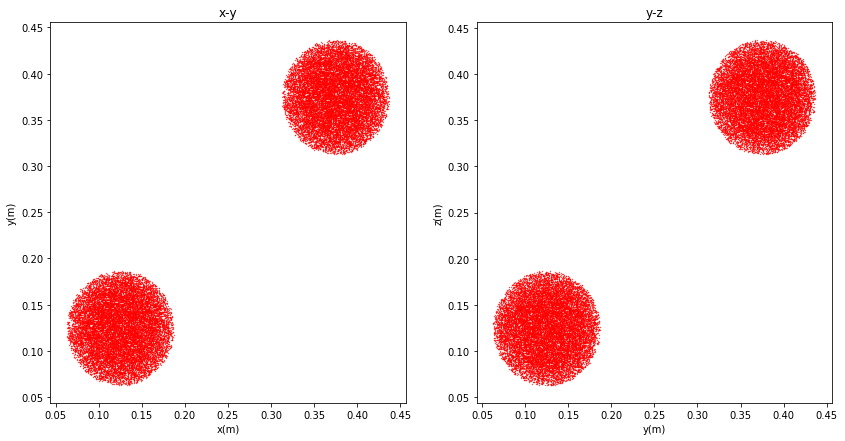

In [15]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt, arccos, cbrt

#random
from numpy.random import seed, rand

#3D plotting
import mpl_toolkits.mplot3d.axes3d as axes3d

# SciPy
import scipy.fftpack as fft

#widgets ***see note
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider
import ipywidgets as widgets


G=6.6738*10**-11 #m^3 kg^-1 s^-2

Nc=64
Np=32**3
L=1
m=.1 
Rs = L/4

se=12
λ = .5
eps = 1*(10**(-12))

Ms = m*Np
t_dyn=sqrt(((pi**2)*(Rs**3))/(4*G*Ms))
Rs = L/16

def plotPar():
    sphPos=np.zeros((Np//2,3))
    
    seed(se); 
    
    sphPos[:Np,0]=(rand(Np//2)**(1/3))*Rs
    sphPos[:Np,1]=arccos(rand(Np//2)*2 -1)
    sphPos[:Np,2]=rand(Np//2)*(2*pi)
    
    if(Np==1):
        sphPos[:Np//2,0]=0
        sphPos[:Np//2,1]=0
        sphPos[:Np//2,2]=0
    
    x=sphPos[:,0]*sin(sphPos[:Np//2,1])*cos(sphPos[:Np//2,2])
    y=sphPos[:Np//2,0]*sin(sphPos[:Np//2,1])*sin(sphPos[:Np//2,2])
    z=sphPos[:Np//2,0]*cos(sphPos[:Np//2,1])
    
    c1=L/4
    c2=3*L/4
    
    x1=x+c1/2
    y1=y+c1/2
    z1=z+c1/2
    
    x2=x+c2/2
    y2=y+c2/2
    z2=z+c2/2
    
    x=np.zeros((Np))
    y=np.zeros((Np))
    z=np.zeros((Np))
    
    x[:Np//2],x[Np//2:]=x1,x2
    y[:Np//2],y[Np//2:]=y1,y2
    z[:Np//2],z[Np//2:]=z1,z2
    
    return x,y,z



##initial position and velocity
part=np.ones((Np,9))
part[:Np,0], part[:Np,1], part[:Np,2]= plotPar()
part[:Np,3:6]=0


fig = plt.figure(figsize=(14, 7))

x=part[:Np,0]
y=part[:Np,1]
z=part[:Np,2]

xmin , xmax, ymin, ymax = 0,1,0,1


ax2 = fig.add_subplot(121)
ax2.scatter(part[:Np,0], part[:Np,1], s=.1, c='r', marker='o')
plt.title('x-y')
plt.xlabel('x(m)')
plt.ylabel('y(m)')

ax3 = fig.add_subplot(122)
ax3.scatter(part[:Np,1], part[:Np,2], s=.1, c='r', marker='o')
plt.title('y-z')
plt.xlabel('y(m)')
plt.ylabel('z(m)')

plt.show()


